In [44]:
# necessary libraries

# %pylab inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# read data to DataFrame
import pandas as pd
import numpy as np

# feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tokenize.casual import casual_tokenize
from nltk.corpus import stopwords

# pipeline
from sklearn.pipeline import Pipeline

# model selection
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score,  classification_report, confusion_matrix, make_scorer
from sklearn.base import BaseEstimator, TransformerMixin

# decomposition PCA
from sklearn.decomposition import IncrementalPCA, TruncatedSVD
from sklearn.decomposition import NMF, LatentDirichletAllocation

# classifiers
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

#learning
from sklearn.model_selection import learning_curve

# time
from time import time

# progress bar
from tqdm import tqdm

# string
import string

In [45]:
n_top_words = 10
n_components = 70



In [46]:
# load data
PATH_TO_DATA = './simplesentiment/'
files = ['products_sentiment_train.tsv', 'products_sentiment_test.tsv']
train =  pd.read_csv(PATH_TO_DATA+files[0], sep = '\t', header = None, names = ['text', 'target'])
# train, taget, test
data_samples = train.text
y = train.target



## LDiA model

### vectorizer

In [47]:
# data transformer - vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 1),
                             min_df=2,
                             tokenizer=casual_tokenize,
                             analyzer='word',
                             stop_words=set(stopwords.words('english'))|punctuation)

In [48]:
decomposition = NMF(n_components=n_components, random_state=0)

transformer = Pipeline(steps=[('vectorizer', vectorizer), ('decomposition', decomposition)])

print("Fitting NMF model with term counts features ...")
t0 = time()
Xt = transformer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

Fitting NMF model with term counts features ...
done in 4.846s.


In [49]:
display(Xt[1])
print(Xt.shape)

array([0.00000000e+00, 2.93949549e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.19039391e-03, 0.00000000e+00, 0.00000000e+00,
       2.77032904e-03, 3.52710237e-02, 0.00000000e+00, 1.70610830e-03,
       1.08698014e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.90306833e-03, 4.48540055e-03, 4.14654291e-04,
       2.85408209e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.09387856e-03, 0.00000000e+00, 3.21162134e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.23932268e-03, 2.85174613e-06, 0.00000000e+00,
       0.00000000e+00, 4.19474218e-03, 0.00000000e+00, 0.00000000e+00,
       4.15571613e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.35230530e-02, 6.37893969e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.52568543e-04, 1.02678429e-03, 0.00000000e+00,
      

(2000, 70)


## Components in NMF

In [50]:
def print_top_words(model, feature_names, n_top_words, n):
    for topic_idx, topic in enumerate(model.components_[:n]):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [51]:
print("\nTopics in NMF model:")
feature_names = vectorizer.get_feature_names()
print_top_words(decomposition, feature_names, n_top_words, 10)


Topics in NMF model:
Topic #0: fm radio tuner built voice receiver stern reception option recording
Topic #1: great .. . working sounds value works m12v another four feels
Topic #2: camera digital awesome wonderful compact looking beat canon want con
Topic #3: easy use controls navigate understand found compact transfering clean nomad
Topic #4: phone speaker bluetooth speakerphone owned light makes fantastic overall sturdy
Topic #5: player dvd media mp3 windows firmware need recognize fine affordable
Topic #6: sound quality picture reception superior volume bad cd superb bass
Topic #7: battery life long hours lasts replaceable charge let batteries disappointment
Topic #8: good songs looking games overall quite money exceptional itunes results
Topic #9: love since pail seriously speaker say simply tiny received storage



# PLots

## 2-D

Plotting 2D NMF model with term counts features ...
done in 0.346s.


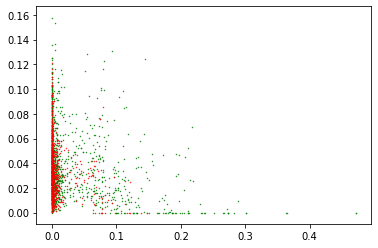

In [52]:
n_components = 2

decomposition = NMF(n_components=n_components, random_state=0)

transformer = Pipeline(steps=[('vectorizer', vectorizer), ('decomposition', decomposition)])

print("Plotting 2D NMF model with term counts features ...")
t0 = time()
Xt = transformer.fit_transform(data_samples)


def d2_plot(Xt, y):
    positive = Xt[y == 1]
    negative = Xt[y == 0]
    plt.scatter(positive[:, 1], positive[:, 0], color='green', s=0.2)
    plt.scatter(negative[:, 1], negative[:, 0], color='red', s=0.2)


d2_plot(Xt, y)

print("done in %0.3fs." % (time() - t0))

## 3-D

Plotting 2D NMF model with term counts features ...
done in 0.337s.


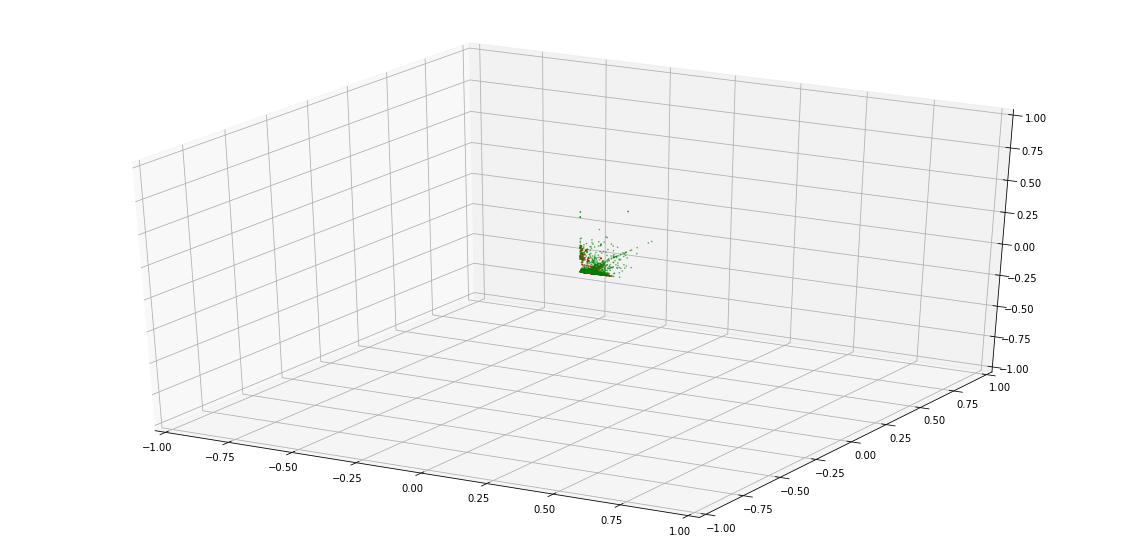

In [54]:
n_components = 3

decomposition = NMF(n_components=n_components, random_state=0)

transformer = Pipeline(steps=[('vectorizer', vectorizer), ('decomposition', decomposition)])

print("Plotting 2D NMF model with term counts features ...")
t0 = time()
Xt = transformer.fit_transform(data_samples)

def d3_plot(Xt, y):
    positive = Xt[y == 1]
    negative = Xt[y == 0]
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(positive[:, 0],
               positive[:, 1],
               positive[:, 2],
               color='green',
               s=0.5,
               alpha=0.5)
    ax.scatter(negative[:, 0],
               negative[:, 1],
               negative[:, 2],
               color='red',
               s=1)
    plt.xlim((-1, 1))
    plt.ylim((-1, 1))
    ax.set_zlim(-1, 1)


d3_plot(Xt, y)
print("done in %0.3fs." % (time() - t0))

## Classifiers

In [55]:
# split data
def split_data(X, y, rs):
    test_portion = 0.33
    return train_test_split(X,
                            y,
                            test_size=test_portion,
                            random_state=int(rs),
                            shuffle=True,
                            stratify=y)


# data transformation
def transform_data(train, validation, t):
    t.fit(train)
    return t.transform(train), t.transform(validation)

In [60]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state=3, class_weight='balanced', probability = True)
r_seed = 22

In [61]:
from sklearn.naive_bayes import ComplementNB
# classifier = ComplementNB()

### Search opt. n_components

100%|██████████| 21/21 [00:57<00:00,  2.73s/it]


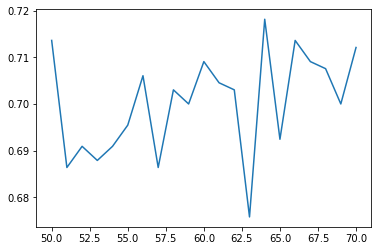

In [64]:
# split data to train/validation sets
X_train, X_validation, y_train, y_val = split_data(data_samples, y, r_seed)

scores = []
max_lim = 70
min_lim = 50
n_range = np.linspace(min_lim, max_lim, max_lim-min_lim+1).astype(int)
scorer = accuracy_score
# scorer = roc_auc_score

for n in tqdm(n_range):
    # decompositor
    decomposition = NMF(n_components=n, random_state=0)
    transformer = Pipeline(steps=[('vectorizer', vectorizer), ('decomposition', decomposition)])
    # transformer
    pipe = Pipeline(steps=[('transformer', transformer), ('classifier', classifier)])
    # fit classifier with train data
    pipe.fit(X_train, y_train)
    # get predictions as probabilities [0..1]
    prob_scores = pipe.predict_proba(X_validation)[:, 1]
    score = scorer(y_val, (prob_scores>0.5).astype(int))
    scores.append(score)

plt.plot(n_range, scores)

In [65]:
np.mean(scores), np.std(scores)

(0.7002886002886003, 0.010902064512279416)